In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('../../data/preprocessed_data.csv')

In [3]:
df.head(5)

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,su_attempted,num_root,...,service_smtp,flag_S0,flag_SF,flag_other,land_1,logged_in_1,root_shell_1,is_host_login_1,is_guest_login_1,attack_category
0,-0.110249,-0.007679,-0.004919,-0.089486,-0.007736,-0.095076,-0.027023,-0.011664,-0.024437,-0.012385,...,0,0,1,0,0,0,0,0,0,1
1,-0.110249,-0.007737,-0.004919,-0.089486,-0.007736,-0.095076,-0.027023,-0.011664,-0.024437,-0.012385,...,0,0,1,0,0,0,0,0,0,1
2,-0.110249,-0.007762,-0.004919,-0.089486,-0.007736,-0.095076,-0.027023,-0.011664,-0.024437,-0.012385,...,0,1,0,0,0,0,0,0,0,0
3,-0.110249,-0.007723,-0.002891,-0.089486,-0.007736,-0.095076,-0.027023,-0.011664,-0.024437,-0.012385,...,0,0,1,0,0,1,0,0,0,1
4,-0.110249,-0.007728,-0.004814,-0.089486,-0.007736,-0.095076,-0.027023,-0.011664,-0.024437,-0.012385,...,0,0,1,0,0,1,0,0,0,1


In [4]:
df.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'num_compromised', 'su_attempted', 'num_root',
       'num_file_creations', 'num_shells', 'num_access_files', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'protocol_type_tcp',
       'protocol_type_udp', 'service_http', 'service_other', 'service_private',
       'service_smtp', 'flag_S0', 'flag_SF', 'flag_other', 'land_1',
       'logged_in_1', 'root_shell_1', 'is_host_login_1', 'is_guest_login_1',
       'attack_category'],
      dtype='object')

<br/>
<br/>
<br/>

#### TRAIN TEST SPLIT

In [5]:
from sklearn.model_selection import train_test_split

X = df.drop(['attack_category'],axis=1)
y = df['attack_category']

X_train,X_test,y_train,y_test = train_test_split( X , y , test_size=0.3 , random_state=42 , stratify = y)

<br/>
<br/>

#### REINDEXING DF

In [6]:
len(X_train)
reindex_train = [i for i in range(len(X_train))]
reindex_test = [i for i in range(len(X_test))]

In [7]:
X_train = X_train.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)

In [8]:
X_train.head(5)

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,su_attempted,num_root,...,service_private,service_smtp,flag_S0,flag_SF,flag_other,land_1,logged_in_1,root_shell_1,is_host_login_1,is_guest_login_1
0,-0.110249,-0.007762,-0.004919,-0.089486,-0.007736,-0.095076,-0.027023,-0.011664,-0.024437,-0.012385,...,0,0,1,0,0,0,0,0,0,0
1,-0.110249,-0.007762,-0.004919,-0.089486,-0.007736,-0.095076,-0.027023,-0.011664,-0.024437,-0.012385,...,0,0,0,0,0,0,0,0,0,0
2,-0.110249,-0.007762,-0.004919,-0.089486,-0.007736,-0.095076,-0.027023,-0.011664,-0.024437,-0.012385,...,0,0,1,0,0,0,0,0,0,0
3,-0.110249,-0.007762,-0.004919,-0.089486,-0.007736,-0.095076,-0.027023,-0.011664,-0.024437,-0.012385,...,0,0,1,0,0,0,0,0,0,0
4,-0.110249,-0.007762,-0.004919,-0.089486,-0.007736,-0.095076,-0.027023,-0.011664,-0.024437,-0.012385,...,1,0,0,1,0,0,0,0,0,0


In [9]:
y_train.head(5)

0    0
1    1
2    0
3    0
4    2
Name: attack_category, dtype: int64

<br/>
<br/>
<br/>

### MODEL

In [10]:
mdepth = 3
from sklearn.tree import DecisionTreeClassifier,plot_tree
dtree = DecisionTreeClassifier( random_state = 42  )

In [11]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [12]:
y_pred = dtree.predict(X_test)

In [13]:
from sklearn.metrics import classification_report
y_true = y_test
target_names = [ 'dos', 'normal', 'probe' , 'r2l' , 'u2r' ]
report = classification_report(y_true, y_pred, target_names=target_names)

In [14]:
print(report)

              precision    recall  f1-score   support

         dos       1.00      1.00      1.00     13778
      normal       1.00      1.00      1.00     20479
       probe       0.99      0.99      0.99      3497
         r2l       0.68      0.84      0.75        25
         u2r       0.90      0.69      0.78        13

    accuracy                           1.00     37792
   macro avg       0.91      0.90      0.90     37792
weighted avg       1.00      1.00      1.00     37792



In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_true,y_pred)
print(confusion_matrix)

[[13774     1     3     0     0]
 [   11 20439    19     9     1]
 [    3    17  3477     0     0]
 [    0     4     0    21     0]
 [    0     2     1     1     9]]


In [16]:
pd.DataFrame(confusion_matrix , index = target_names , columns = target_names)

,dos,normal,probe,r2l,u2r
dos,13774,1,3,0,0
normal,11,20439,19,9,1
probe,3,17,3477,0,0
r2l,0,4,0,21,0
u2r,0,2,1,1,9


In [17]:
y_test.value_counts()

1    20479
0    13778
2     3497
3       25
4       13
Name: attack_category, dtype: int64

In [18]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV( DecisionTreeClassifier( random_state = 42  ) , {
    'max_depth' : [3,6,9,12,15,18],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best','random']
} , cv = 10 , return_train_score = False , verbose = 5 )

clf.fit(X,y)
clf.cv_results_

Fitting 10 folds for each of 36 candidates, totalling 360 fits
[CV 1/10] END criterion=gini, max_depth=3, splitter=best;, score=0.959 total time=   0.1s
[CV 2/10] END criterion=gini, max_depth=3, splitter=best;, score=0.958 total time=   0.1s
[CV 3/10] END criterion=gini, max_depth=3, splitter=best;, score=0.961 total time=   0.1s
[CV 4/10] END criterion=gini, max_depth=3, splitter=best;, score=0.960 total time=   0.1s
[CV 5/10] END criterion=gini, max_depth=3, splitter=best;, score=0.957 total time=   0.2s
[CV 6/10] END criterion=gini, max_depth=3, splitter=best;, score=0.958 total time=   0.1s
[CV 7/10] END criterion=gini, max_depth=3, splitter=best;, score=0.958 total time=   0.1s
[CV 8/10] END criterion=gini, max_depth=3, splitter=best;, score=0.958 total time=   0.1s
[CV 9/10] END criterion=gini, max_depth=3, splitter=best;, score=0.959 total time=   0.1s
[CV 10/10] END criterion=gini, max_depth=3, splitter=best;, score=0.958 total time=   0.1s
[CV 1/10] END criterion=gini, max_de

[CV 1/10] END criterion=gini, max_depth=15, splitter=random;, score=0.997 total time=   0.3s
[CV 2/10] END criterion=gini, max_depth=15, splitter=random;, score=0.996 total time=   0.3s
[CV 3/10] END criterion=gini, max_depth=15, splitter=random;, score=0.997 total time=   0.3s
[CV 4/10] END criterion=gini, max_depth=15, splitter=random;, score=0.996 total time=   0.3s
[CV 5/10] END criterion=gini, max_depth=15, splitter=random;, score=0.998 total time=   0.3s
[CV 6/10] END criterion=gini, max_depth=15, splitter=random;, score=0.997 total time=   0.3s
[CV 7/10] END criterion=gini, max_depth=15, splitter=random;, score=0.997 total time=   0.3s
[CV 8/10] END criterion=gini, max_depth=15, splitter=random;, score=0.997 total time=   0.3s
[CV 9/10] END criterion=gini, max_depth=15, splitter=random;, score=0.998 total time=   0.3s
[CV 10/10] END criterion=gini, max_depth=15, splitter=random;, score=0.998 total time=   0.3s
[CV 1/10] END criterion=gini, max_depth=18, splitter=best;, score=0.9

[CV 9/10] END criterion=entropy, max_depth=9, splitter=random;, score=0.990 total time=   0.2s
[CV 10/10] END criterion=entropy, max_depth=9, splitter=random;, score=0.979 total time=   0.2s
[CV 1/10] END criterion=entropy, max_depth=12, splitter=best;, score=0.998 total time=   0.4s
[CV 2/10] END criterion=entropy, max_depth=12, splitter=best;, score=0.998 total time=   0.4s
[CV 3/10] END criterion=entropy, max_depth=12, splitter=best;, score=0.998 total time=   0.4s
[CV 4/10] END criterion=entropy, max_depth=12, splitter=best;, score=0.998 total time=   0.4s
[CV 5/10] END criterion=entropy, max_depth=12, splitter=best;, score=0.998 total time=   0.4s
[CV 6/10] END criterion=entropy, max_depth=12, splitter=best;, score=0.998 total time=   0.4s
[CV 7/10] END criterion=entropy, max_depth=12, splitter=best;, score=0.998 total time=   0.4s
[CV 8/10] END criterion=entropy, max_depth=12, splitter=best;, score=0.998 total time=   0.4s
[CV 9/10] END criterion=entropy, max_depth=12, splitter=b

[CV 6/10] END criterion=log_loss, max_depth=6, splitter=best;, score=0.994 total time=   0.3s
[CV 7/10] END criterion=log_loss, max_depth=6, splitter=best;, score=0.995 total time=   0.3s
[CV 8/10] END criterion=log_loss, max_depth=6, splitter=best;, score=0.995 total time=   0.3s
[CV 9/10] END criterion=log_loss, max_depth=6, splitter=best;, score=0.995 total time=   0.3s
[CV 10/10] END criterion=log_loss, max_depth=6, splitter=best;, score=0.994 total time=   0.3s
[CV 1/10] END criterion=log_loss, max_depth=6, splitter=random;, score=0.986 total time=   0.1s
[CV 2/10] END criterion=log_loss, max_depth=6, splitter=random;, score=0.967 total time=   0.1s
[CV 3/10] END criterion=log_loss, max_depth=6, splitter=random;, score=0.967 total time=   0.1s
[CV 4/10] END criterion=log_loss, max_depth=6, splitter=random;, score=0.978 total time=   0.1s
[CV 5/10] END criterion=log_loss, max_depth=6, splitter=random;, score=0.957 total time=   0.1s
[CV 6/10] END criterion=log_loss, max_depth=6, sp

[CV 2/10] END criterion=log_loss, max_depth=18, splitter=random;, score=0.998 total time=   0.2s
[CV 3/10] END criterion=log_loss, max_depth=18, splitter=random;, score=0.998 total time=   0.2s
[CV 4/10] END criterion=log_loss, max_depth=18, splitter=random;, score=0.998 total time=   0.2s
[CV 5/10] END criterion=log_loss, max_depth=18, splitter=random;, score=0.999 total time=   0.2s
[CV 6/10] END criterion=log_loss, max_depth=18, splitter=random;, score=0.998 total time=   0.2s
[CV 7/10] END criterion=log_loss, max_depth=18, splitter=random;, score=0.998 total time=   0.2s
[CV 8/10] END criterion=log_loss, max_depth=18, splitter=random;, score=0.998 total time=   0.2s
[CV 9/10] END criterion=log_loss, max_depth=18, splitter=random;, score=0.999 total time=   0.2s
[CV 10/10] END criterion=log_loss, max_depth=18, splitter=random;, score=0.999 total time=   0.2s


{'mean_fit_time': array([0.23069286, 0.14420645, 0.38110425, 0.22409897, 0.51430268,
        0.29670076, 0.64019547, 0.34030049, 0.72509987, 0.38339682,
        0.78790791, 0.38490276, 0.23459837, 0.14560747, 0.40019684,
        0.2255085 , 0.50980237, 0.28000011, 0.51190708, 0.29550014,
        0.51640046, 0.30099921, 0.5105036 , 0.29559255, 0.2304002 ,
        0.13930707, 0.38920403, 0.22750053, 0.50259614, 0.27919984,
        0.51429813, 0.29310369, 0.50930252, 0.29929307, 0.51430309,
        0.2882041 ]),
 'std_fit_time': array([0.00882219, 0.00514039, 0.00610898, 0.00772203, 0.00911617,
        0.02147524, 0.01366461, 0.01462241, 0.01596674, 0.02213387,
        0.01668925, 0.02000882, 0.00481234, 0.00763551, 0.02521258,
        0.008671  , 0.0095145 , 0.01261744, 0.01224171, 0.01649896,
        0.01247556, 0.01561091, 0.01272791, 0.01175882, 0.00490251,
        0.00460036, 0.00641543, 0.00826381, 0.00905817, 0.0151396 ,
        0.016665  , 0.01554996, 0.00960762, 0.01441711, 0.014

In [19]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_splitter,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.230693,0.008822,0.007106,0.001039,gini,3,best,"{'criterion': 'gini', 'max_depth': 3, 'splitte...",0.958882,0.957533,...,0.959911,0.957053,0.957926,0.957530,0.957530,0.958720,0.958244,0.958436,0.001176,33
1,0.144206,0.005140,0.006302,0.000455,gini,3,random,"{'criterion': 'gini', 'max_depth': 3, 'splitte...",0.905302,0.910224,...,0.910455,0.913154,0.913313,0.913551,0.910772,0.912201,0.913233,0.911426,0.002359,34
2,0.381104,0.006109,0.005899,0.000301,gini,6,best,"{'criterion': 'gini', 'max_depth': 6, 'splitte...",0.991903,0.991030,...,0.991427,0.991506,0.991030,0.990712,0.992220,0.990077,0.991982,0.991474,0.000764,24
3,0.224099,0.007722,0.007096,0.001139,gini,6,random,"{'criterion': 'gini', 'max_depth': 6, 'splitte...",0.974758,0.965312,...,0.972533,0.980789,0.971739,0.972136,0.969993,0.971501,0.963642,0.971573,0.004517,28
4,0.514303,0.009116,0.006300,0.001096,gini,9,best,"{'criterion': 'gini', 'max_depth': 9, 'splitte...",0.998095,0.996825,...,0.997301,0.998095,0.997460,0.996745,0.997380,0.996983,0.997301,0.997341,0.000438,17
5,0.296701,0.021475,0.007096,0.000832,gini,9,random,"{'criterion': 'gini', 'max_depth': 9, 'splitte...",0.983807,0.979362,...,0.982297,0.981424,0.983091,0.982139,0.981107,0.984520,0.985076,0.982560,0.001610,27
6,0.640195,0.013665,0.005905,0.000291,gini,12,best,"{'criterion': 'gini', 'max_depth': 12, 'splitt...",0.998651,0.997539,...,0.997698,0.998492,0.998095,0.997222,0.998333,0.998015,0.997936,0.997968,0.000422,11
7,0.340300,0.014622,0.007102,0.000944,gini,12,random,"{'criterion': 'gini', 'max_depth': 12, 'splitt...",0.996825,0.992142,...,0.995634,0.993649,0.994602,0.996269,0.994126,0.993173,0.994761,0.994634,0.001354,21
8,0.725100,0.015967,0.005999,0.000638,gini,15,best,"{'criterion': 'gini', 'max_depth': 15, 'splitt...",0.998095,0.998016,...,0.997857,0.998412,0.998095,0.997618,0.998333,0.998412,0.998174,0.998063,0.000278,10
9,0.383397,0.022134,0.007110,0.001053,gini,15,random,"{'criterion': 'gini', 'max_depth': 15, 'splitt...",0.997460,0.995793,...,0.996428,0.997618,0.996507,0.996507,0.996904,0.998015,0.997698,0.997023,0.000669,18


In [55]:
df = df[['param_max_depth','param_criterion','param_splitter','mean_test_score']]
df.sort_values(by=['mean_test_score'] , ascending=False)

,param_max_depth,param_criterion,param_splitter,mean_test_score
35,18,log_loss,random,0.998365
23,18,entropy,random,0.998365
20,15,entropy,best,0.998325
32,15,log_loss,best,0.998325
34,18,log_loss,best,0.998309
22,18,entropy,best,0.998309
30,12,log_loss,best,0.998230
18,12,entropy,best,0.998230
10,18,gini,best,0.998142
8,15,gini,best,0.998063


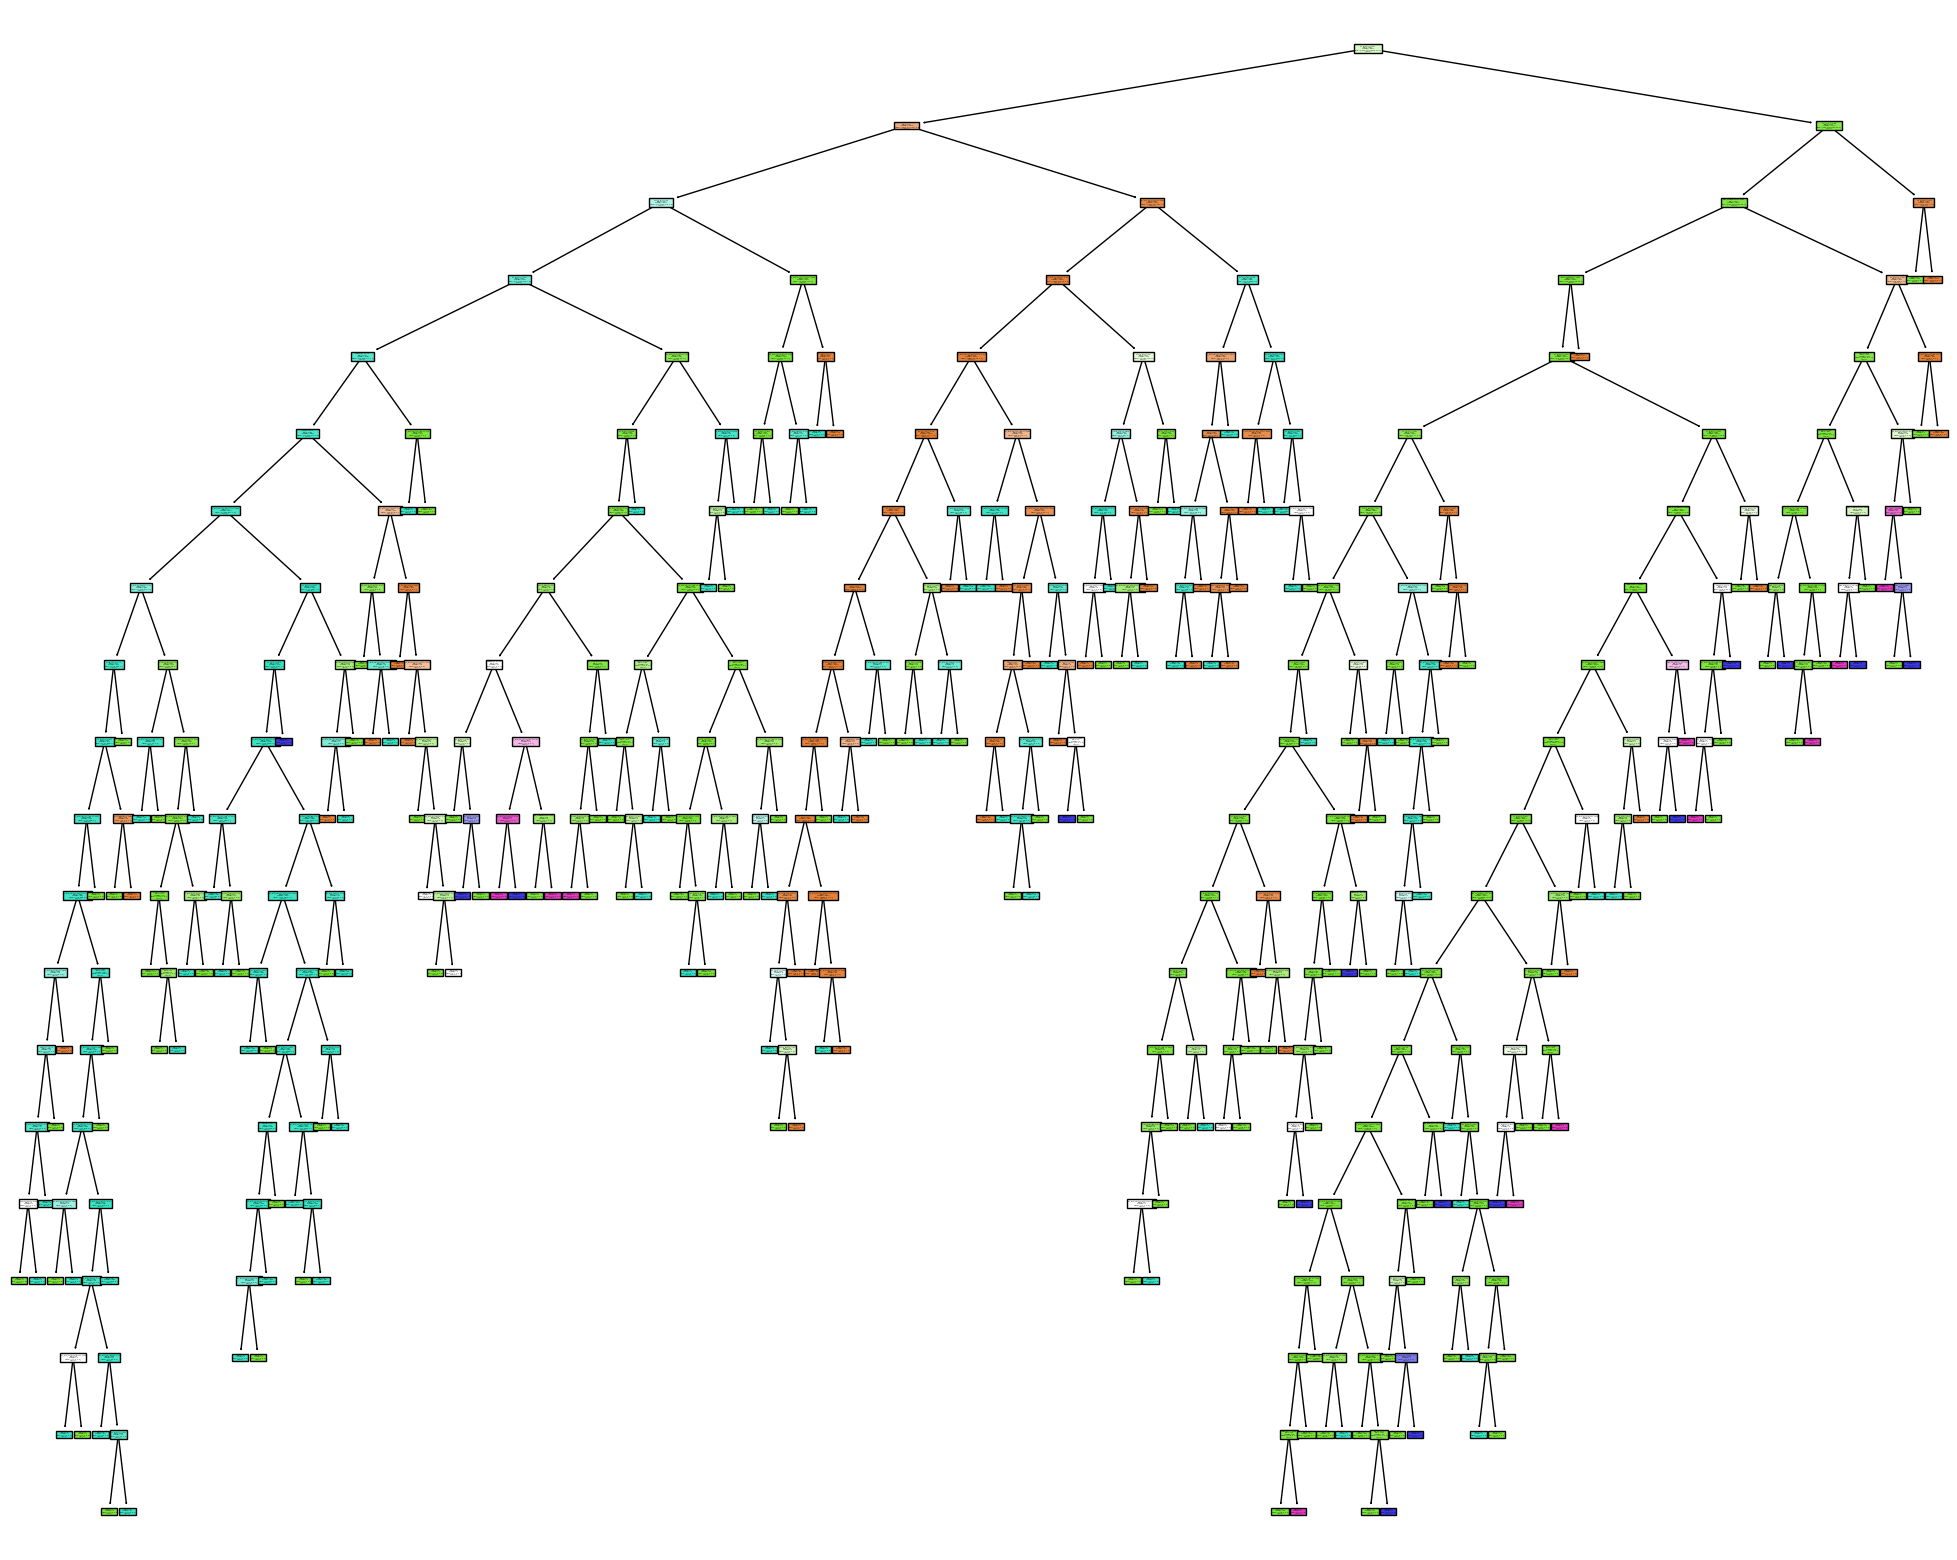

In [20]:
from sklearn import tree
fig = plt.figure(figsize = (25,20))
plot = tree.plot_tree(dtree,
                     feature_names = X_train.columns,
                     class_names = "attack_category",
                     filled = True)

In [21]:
final_dtree_model = DecisionTreeClassifier( random_state = 42 , 
                                           max_depth = 15 , 
                                           criterion='entropy' , 
                                           splitter='best'  )
final_dtree_model.fit(X_train,y_train)
y_pred = final_dtree_model.predict(X_test)

y_true = y_test
target_names = [ 'dos', 'normal', 'probe' , 'r2l' , 'u2r' ]
report = classification_report(y_true, y_pred, target_names=target_names)
print(report)

              precision    recall  f1-score   support

         dos       1.00      1.00      1.00     13778
      normal       1.00      1.00      1.00     20479
       probe       1.00      1.00      1.00      3497
         r2l       0.80      0.80      0.80        25
         u2r       0.59      0.77      0.67        13

    accuracy                           1.00     37792
   macro avg       0.88      0.91      0.89     37792
weighted avg       1.00      1.00      1.00     37792



In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_true,y_pred)
pd.DataFrame(confusion_matrix , index = target_names , columns = target_names)

,dos,normal,probe,r2l,u2r
dos,13774,2,2,0,0
normal,7,20450,10,5,7
probe,0,17,3480,0,0
r2l,0,5,0,20,0
u2r,0,2,1,0,10


In [23]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score 
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score( y_true , y_pred , average = None )
recall = recall_score( y_true , y_pred , average = None )
f1score = f1_score( y_true , y_pred , average = None )

In [24]:
print(accuracy)
print(precision)
print(recall)
print(f1score)

0.998465283657917
[0.99949205 0.99873022 0.99627827 0.8        0.58823529]
[0.99970968 0.99858392 0.99513869 0.8        0.76923077]
[0.99960086 0.99865706 0.99570815 0.8        0.66666667]


In [25]:
data = {
    "model" : "Descision Tree",
    "max_depth": 15 ,
    "criterion": "entropy" ,
    "splitter": "best" ,
    "accuracy" : accuracy ,
    "precision" : precision.tolist() ,
    "recall" : recall.tolist() ,
    "F1_score" : f1score.tolist() ,
    "class_names" : target_names
}

data

{'model': 'Descision Tree',
 'max_depth': 15,
 'criterion': 'entropy',
 'splitter': 'best',
 'accuracy': 0.998465283657917,
 'precision': [0.9994920542776287,
  0.9987302207462395,
  0.996278270827369,
  0.8,
  0.5882352941176471],
 'recall': [0.9997096821019016,
  0.9985839152302358,
  0.9951386903059766,
  0.8,
  0.7692307692307693],
 'F1_score': [0.9996008563445699,
  0.9986570626297155,
  0.9957081545064378,
  0.8000000000000002,
  0.6666666666666667],
 'class_names': ['dos', 'normal', 'probe', 'r2l', 'u2r']}

In [26]:
import json
with open("../../model_performances/decision_tree.json", "w") as outfile:
    json.dump(data, outfile)